In [25]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
training_data = pd.read_csv("TrainingData/pre_processed.csv")

In [4]:
def plot_predicted_and_target(target_data, predicted_data, title): 
    plt.figure(figsize=(20,10))
    font = {'size'   : 20}
    plt.rc('font', **font)
    
    plt.plot(range(1, len(predicted_data) + 1), predicted_data, label = "predicted")
    plt.plot(range(1, len(target_data) + 1), target_data, label = "target")
    
    plt.xlabel('scenario')
    plt.ylabel('response time')
    plt.title(title)
    plt.legend()
    plt.show()

In [5]:
def plot_mse(raw_mse, title): 
    plt.figure(figsize=(20,10))
    plt.plot(range(1, len(raw_mse) + 1), raw_mse, label = "MSE")
    plt.xlabel('scenario')
    plt.ylabel('error')
    plt.title(title)
    plt.legend()
    plt.show()

In [6]:
def get_MSE(target_data, predicted_data):
    uniform_average = mean_squared_error(target_data, predicted_data, multioutput='uniform_average')
    raw_values = mean_squared_error(target_data, predicted_data, multioutput='raw_values')
    return uniform_average, raw_values

In [7]:
target = training_data['avg_response_time']
train = training_data.drop(['avg_response_time'], axis=1)

# XGBoost

In [8]:
xgb_model = xgb.XGBRegressor()
xgb_y_pred = cvp(xgb_model, train, target, cv = 5, n_jobs = 1)
xgb_y_pred

array([1.2848253 , 0.6593998 , 0.66241986, 1.2798884 , 3.766056  ,
       1.278427  , 1.2725897 , 0.6672257 , 1.2888066 , 0.498271  ,
       1.966946  , 0.66082466, 2.001902  , 0.6416797 , 1.0034031 ,
       0.64764696, 0.41167113, 3.4639733 , 1.2875353 , 0.5017826 ,
       1.2775104 , 3.7724998 , 0.29733294, 1.8906329 , 1.2854357 ,
       1.9773315 , 0.6503484 , 1.27945   , 0.9912301 , 0.6595086 ,
       0.16670933, 0.665718  , 0.6639964 , 0.14655411, 2.5569613 ,
       0.67259824, 0.6466689 , 0.6465819 , 1.9826113 , 1.8953732 ,
       0.14957918, 1.2831649 , 1.2847049 , 0.1632108 , 3.6206124 ,
       0.14952667, 0.64052606, 0.6724962 , 1.268262  , 1.015674  ,
       1.2884562 , 1.2801939 , 1.9861792 , 2.213949  , 0.41205364,
       0.6570279 , 2.020996  , 1.270979  , 1.7504163 , 1.2839209 ,
       2.2337801 , 1.2873191 , 0.6690244 , 0.30632883, 1.2968678 ,
       2.0265715 , 0.6515955 , 0.67412865, 2.1445868 , 0.3986621 ,
       1.2716913 , 1.2677256 , 0.14811024, 0.66366106, 0.66055

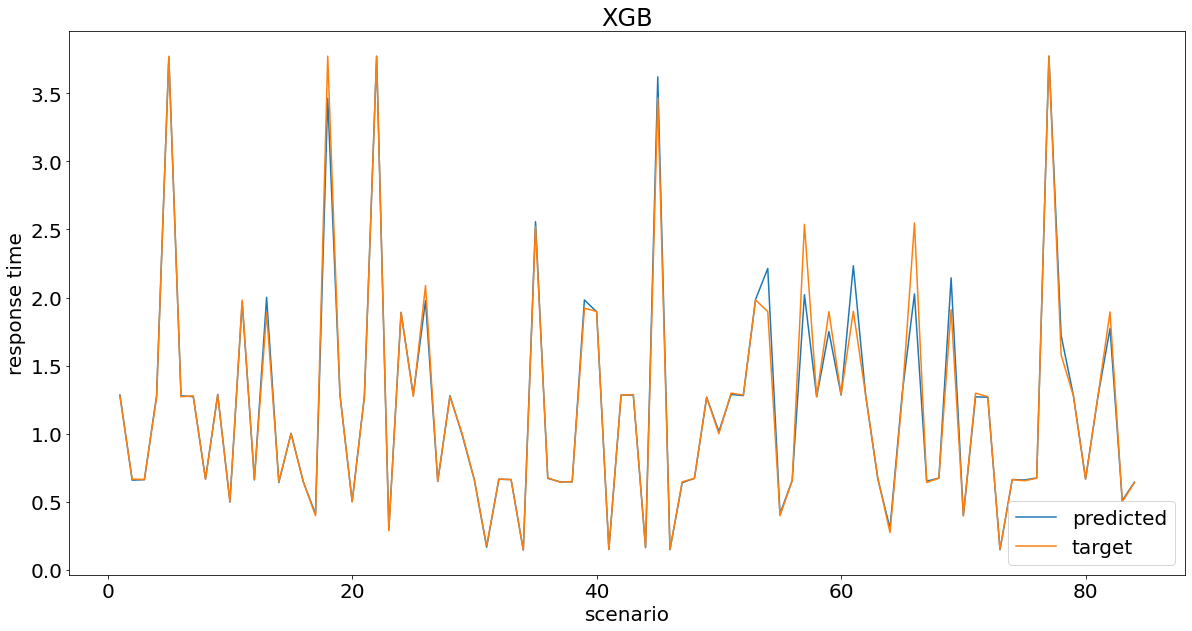

In [9]:
plot_predicted_and_target(target, xgb_y_pred, 'XGB')

In [10]:
xgb_mse, xgb_mse_raw = get_MSE(target, xgb_y_pred)
print("XGB MSE:{}".format(xgb_mse))

XGB MSE:0.01209731957272633


# Linear Regression

In [11]:
reg_model = LinearRegression()
reg_y_pred = cvp(reg_model, train, target, cv = 5, n_jobs = 1)
reg_y_pred

array([ 1.56770352,  0.68495956,  0.65112608,  1.29341353,  2.9700633 ,
        1.22723843,  1.35489974,  0.66848045,  1.30768999,  0.40226609,
        1.94012439,  0.6752556 ,  1.89188873,  0.70984537,  1.04152343,
        0.59065148,  1.1178924 ,  3.81364266,  1.29307324,  0.42261432,
        1.33256516,  2.96002144,  0.41768065,  1.81438617,  1.00819489,
        1.92328924,  0.52586823,  1.69508033,  0.9954559 ,  0.65976176,
       -0.23047034,  0.64337451,  0.57700692, -0.39977348,  2.60042038,
        0.70991704,  0.55456337,  0.65490883,  2.08754384,  1.89602684,
       -0.54553685,  1.24591454,  1.32988076, -0.35918048,  3.70190677,
       -0.45447877,  0.62168617,  0.7016669 ,  1.24808712,  1.20447785,
        1.88114237,  1.29883203,  1.96988836,  2.0679477 ,  1.11883692,
        0.62777569,  2.44536572,  1.71686516,  1.89788361,  1.79931916,
        1.91244413,  1.37529931,  0.62325419,  0.46888881,  1.95597283,
        2.42217748,  0.85555714,  0.67875956,  1.94663212,  0.99

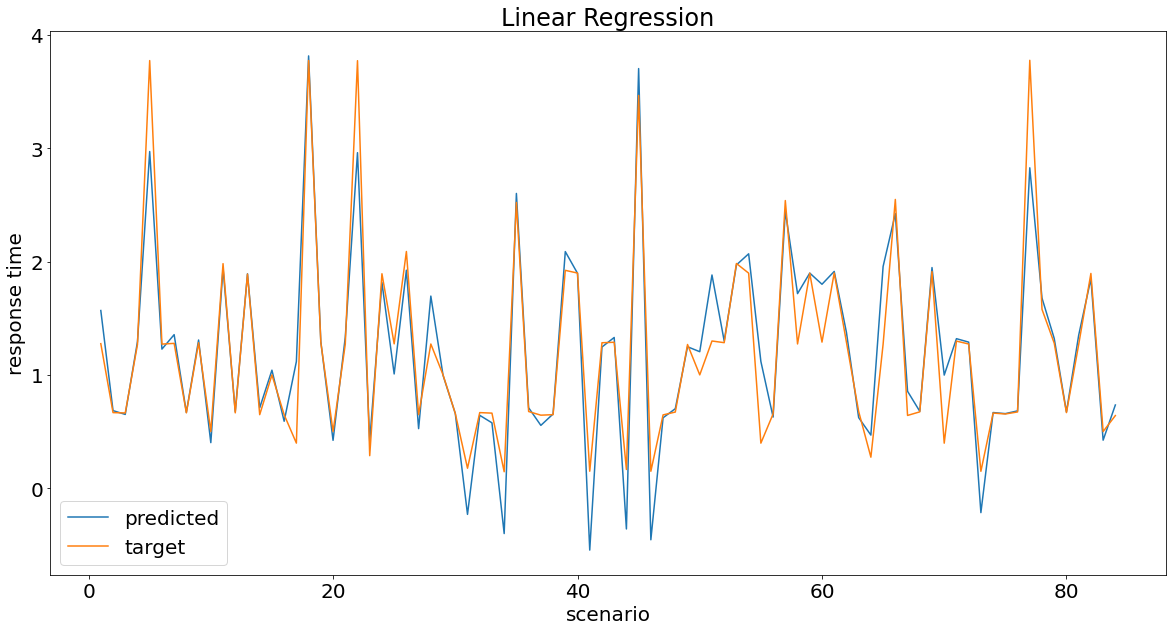

In [12]:
plot_predicted_and_target(target, reg_y_pred, 'Linear Regression')

In [13]:
reg_mse, reg_mse_raw = get_MSE(target, reg_y_pred)
print("Linear Regression MSE:{}".format(reg_mse))

Linear Regression MSE:0.08772286660311004


# LSTM

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

In [15]:
tf_dataset = tf.data.Dataset.from_tensor_slices((train.values, target.values))

In [16]:
train_tf_dataset = tf_dataset.shuffle(len(train)).batch(1)

In [19]:
model = get_compiled_model()
model.fit(train_tf_dataset, epochs=15)

Epoch 1/15
84/84 [==============================] - 0s 532us/step - loss: 136073.6562
Epoch 2/15
84/84 [==============================] - 0s 426us/step - loss: 15723.0430
Epoch 3/15
84/84 [==============================] - 0s 482us/step - loss: 9034.6699
Epoch 4/15
84/84 [==============================] - 0s 495us/step - loss: 6766.7544
Epoch 5/15
84/84 [==============================] - 0s 434us/step - loss: 5422.8179
Epoch 6/15
84/84 [==============================] - 0s 479us/step - loss: 4102.7334
Epoch 7/15
84/84 [==============================] - 0s 429us/step - loss: 4749.4595
Epoch 8/15
84/84 [==============================] - 0s 459us/step - loss: 3944.9758
Epoch 9/15
84/84 [==============================] - 0s 426us/step - loss: 3879.3792
Epoch 10/15
84/84 [==============================] - 0s 464us/step - loss: 3771.7683
Epoch 11/15
84/84 [==============================] - 0s 422us/step - loss: 3123.2144
Epoch 12/15
84/84 [==============================] - 0s 478us/step - lo